#KNN

**The K-Nearest Neighbors (KNN) algorithm is a simple and straightforward method used in machine learning for classification and regression tasks.**

KNN works by looking at the nearest neighbors of something new and deciding what it should be based on what most of those neighbors are. It’s like asking your friends for advice on something new by seeing what they think.

-----
-----

**Imagine you have a bunch of objects that are already sorted into groups. For example, let's say you have a bunch of fruits, and each fruit is labeled as either an apple, an orange, or a banana.**

Now, you find a new fruit, and you want to figure out what it is. You can use the KNN algorithm to help you. Here’s how:

**Look Around**: You check out the closest fruits to this new one. Let's say you decide to look at the 3 closest fruits (this number is called "K" in KNN).

**Count the Neighbors**: You see that 2 of these nearby fruits are apples, and 1 is a banana.

**Make a Decision**: Since most of the nearby fruits are apples, you decide that your new fruit is also likely to be an apple.

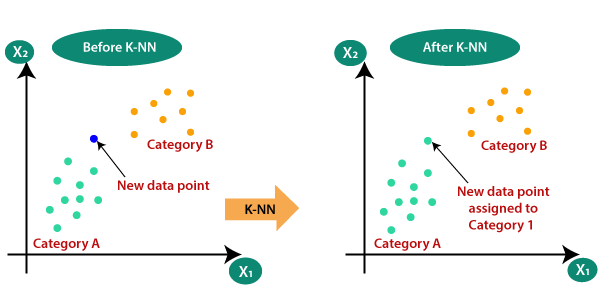

# Problem Statement

---



---




The objective of this case study is to analyze the relationship between symptoms and diseases in order to accurately diagnose a person's condition. With various symptoms such as headache, joint pain, and cough, it is crucial to determine the underlying disease, as it can range from mild to severe. This study highlights the significance of identifying specific symptoms and their corresponding diseases to improve diagnostic accuracy and facilitate appropriate medical treatment

# About The Data

---



---


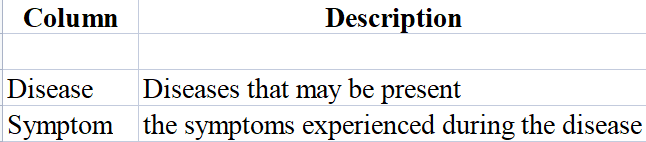

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/dataset (1) (3).csv")

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [ ]:
# percentage of null values
df.isnull().sum()/len(df)*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [ ]:
df.duplicated().sum()

4616

In [ ]:
drop_list=['Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']

In [ ]:
df.drop(columns=drop_list, inplace=True,axis=1)

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
df.isnull().sum()/len(df)*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854


In [ ]:
for col in df.columns:
  df[col].fillna("No Data",inplace=True)




<ipython-input-23-a86cc8e07e4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("No Data",inplace=True)


In [ ]:
df["Symptom_4"].mode()[0]

' high_fever'

In [ ]:
import statistics as stats

l=[2,1,1,2]

stats.multimode(l)

[2, 1]

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,No Data,No Data
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,No Data,No Data,No Data
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,No Data,No Data,No Data
3,Fungal infection,itching,skin_rash,dischromic _patches,No Data,No Data,No Data
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,No Data,No Data,No Data
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,No Data,No Data
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,No Data,No Data
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,15,33,35,35,11,38,32
1,15,24,27,18,50,38,32
2,15,33,27,18,50,38,32
3,15,33,35,18,50,38,32
4,15,33,35,35,50,38,32
...,...,...,...,...,...,...,...
4915,0,28,17,33,38,22,29
4916,2,24,31,3,35,38,32
4917,38,4,4,22,7,38,32
4918,35,24,20,42,36,27,15


In [ ]:
# Check how many unique disease do we have ?
df["Disease"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
df["Disease"].nunique()  # Total number of unique values in diseae column

41

In [ ]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in df.columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,15,33,35,35,11,38,32
1,15,24,27,18,50,38,32
2,15,33,27,18,50,38,32
3,15,33,35,18,50,38,32
4,15,33,35,35,50,38,32
...,...,...,...,...,...,...,...
4915,0,28,17,33,38,22,29
4916,2,24,31,3,35,38,32
4917,38,4,4,22,7,38,32
4918,35,24,20,42,36,27,15


In [ ]:
df=df.drop_duplicates()
df.shape

(262, 7)

In [ ]:
df["Symptom_5"].nunique()

39

In [ ]:
df.duplicated().sum()

4658

# Model Building

In [ ]:
x=df.drop(columns=['Disease'],axis=1) # Independent variable all symptoms
y=df['Disease'] # Dependent variable Disease

In [ ]:
x

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,33,35,35,11,38,32
1,24,27,18,50,38,32
2,33,27,18,50,38,32
3,33,35,18,50,38,32
4,33,35,35,50,38,32
...,...,...,...,...,...,...
402,13,5,38,47,38,32
403,24,5,38,47,38,32
405,24,18,38,47,38,32
406,24,18,4,47,38,32


In [ ]:
y

,Disease
0,15
1,15
2,15
3,15
4,15
...,...
402,27
403,27
405,27
406,27


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
1807,33,35,21,24,13,12
184,6,42,21,19,12,20
205,33,15,28,9,21,0
4581,11,12,8,30,33,28
410,33,35,35,11,38,32
...,...,...,...,...,...,...
4426,24,20,42,36,27,15
466,28,19,29,0,16,32
3092,24,9,26,44,11,13
3772,33,35,35,11,38,32


In [ ]:
y_train

,Disease
1807,8
184,37
205,19
4581,39
410,15
...,...
4426,35
466,33
3092,11
3772,15


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

'''
Start with a few different values for K (like 3, 5, 7, etc.) and test them. The goal is to find the value that gives the best accuracy
on your data.
Often, K=5 is a good starting point because it balances the influence of nearby data points without being too sensitive to noise.

Square Root of N rule: This rule offers a quick and practical way to determine an initial k value for your KNN model

Odd vs. Even:

If your classification problem has two classes (e.g., yes or no), it’s often better to choose an odd number
for K (like 3, 5, or 7) to avoid ties in voting. If K is even, there could be an equal number of neighbors from both classes,
making it harder to classify the new data point.

'''

'\nStart with a few different values for K (like 3, 5, 7, etc.) and test them. The goal is to find the value that gives the best accuracy\non your data.\nOften, K=5 is a good starting point because it balances the influence of nearby data points without being too sensitive to noise.\n\nSquare Root of N rule: This rule offers a quick and practical way to determine an initial k value for your KNN model\n\nOdd vs. Even:\n\nIf your classification problem has two classes (e.g., yes or no), it’s often better to choose an odd number\nfor K (like 3, 5, or 7) to avoid ties in voting. If K is even, there could be an equal number of neighbors from both classes,\nmaking it harder to classify the new data point.\n\n'

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
pred = knn.predict(x_test)

In [ ]:
pred

array([ 1, 19, 27, 10, 23,  5, 34, 17,  1, 40, 33, 23, 12, 12, 27, 35,  5,
        2, 24, 10, 11, 11,  9, 29, 19, 26,  5, 30, 17, 35, 27, 27,  5,  3,
       35, 13, 30, 35, 11, 19, 35, 26, 40, 27, 14, 21, 35,  9, 19, 40,  1,
       10, 40])

In [ ]:
y_test

,Disease
373,2
4916,2
1550,24
3081,1
3857,9
...,...
1101,13
4639,1
3625,11
378,2


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred,y_test)*100

30.18867924528302

In [ ]:
from sklearn.model_selection import cross_val_score

#  you have already initialized and fitted your KNN classifier as 'knn_classifier'

cv_scores = cross_val_score(knn, x, y, cv=5)

'''
In 5-fold cross-validation:

The dataset is split into 5 parts (or "folds").
The model is trained on 4 parts and tested on the remaining 1 part.
This process is repeated 5 times, each time with a different part of the data being used as the test set.
The result is a list of 5 accuracy scores, one for each fold.
'''
'''
cv_scores holds the accuracy scores from each fold of the cross-validation.
cv_scores.mean() calculates the average accuracy across all the folds
'''

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.28301887 0.35849057 0.42307692 0.46153846 0.48076923]
Mean accuracy: 0.4013788098693759


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:

print(knn.predict([[33,35,21,24,13,12]]) )

[8]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,15,33,35,35,11,38,32
1,15,24,27,18,50,38,32
2,15,33,27,18,50,38,32
3,15,33,35,18,50,38,32
4,15,33,35,35,50,38,32
...,...,...,...,...,...,...,...
4915,0,28,17,33,38,22,29
4916,2,24,31,3,35,38,32
4917,38,4,4,22,7,38,32
4918,35,24,20,42,36,27,15
